# **Best Selling Book using Recommendation System**

![picture](https://drive.google.com/uc?id=1mOs4uUFYgfrlsYOIWVgOBkM4GImsx1MN)

In [1]:
# Best Selling  book using Recommendation System

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [4]:
# importing dataset
data=pd.read_csv("/content/best-selling-books.csv")
data

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN


# **Data Preprocessing**

In [ ]:
data.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [ ]:
# finding null values
data.isnull().sum()

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64

In [ ]:
# dropping the nulls
data.dropna(inplace=True)
data

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
119,The Pillars of the Earth,Ken Follett,English,1989,15.0,Historical fiction
125,The Hitchhiker's Guide to the Galaxy,Douglas Adams,English,1979,14.0,Science fiction
134,The Giver,Lois Lowry,English,1993,12.0,Dystopian fiction
143,The Exorcist,William Peter Blatty,English,1971,11.0,Horror


In [ ]:
# Finding unique values for each column in our dataset
for column in data.columns:
    print(column)
    print(len(data[column].unique()))

Book
118
Author(s)
104
Original language
14
First published
80
Approximate sales in millions
42
Genre
80


In [ ]:
# datatype of each column
data.dtypes

Book                              object
Author(s)                         object
Original language                 object
First published                    int64
Approximate sales in millions    float64
Genre                             object
dtype: object

# **Bestselling Book Analysis**




In [ ]:
# Best selling books
import pandas as pd
# Sort the dataset based on 'Approximate Sales in Millions' column in descending order
data_sorted = data.sort_values(by='Approximate sales in millions', ascending=False)
# Select the top 10 bestselling books
top_bestsellers = data_sorted.head(10)
print(top_bestsellers)


                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   
5                                The Hobbit          J. R. R. Tolkien   
6      The Lion, the Witch and the Wardrobe               C. S. Lewis   
7               She: A History of Adventure          H. Rider Haggard   
8       Vardi Wala Gunda (वर्दी वाला गुंडा)        Ved Prakash Sharma   
9                         The Da Vinci Code                 Dan Brown   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                  

<ipython-input-13-820172da9f9a>:12: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: UserWarning: Glyph 22818 (\N{CJK UNIFIED IDEOGRAPH-5922}) missing from current font.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  plt.tight_layout()
<ipython-input-13-820172da9f9a>:12: Us

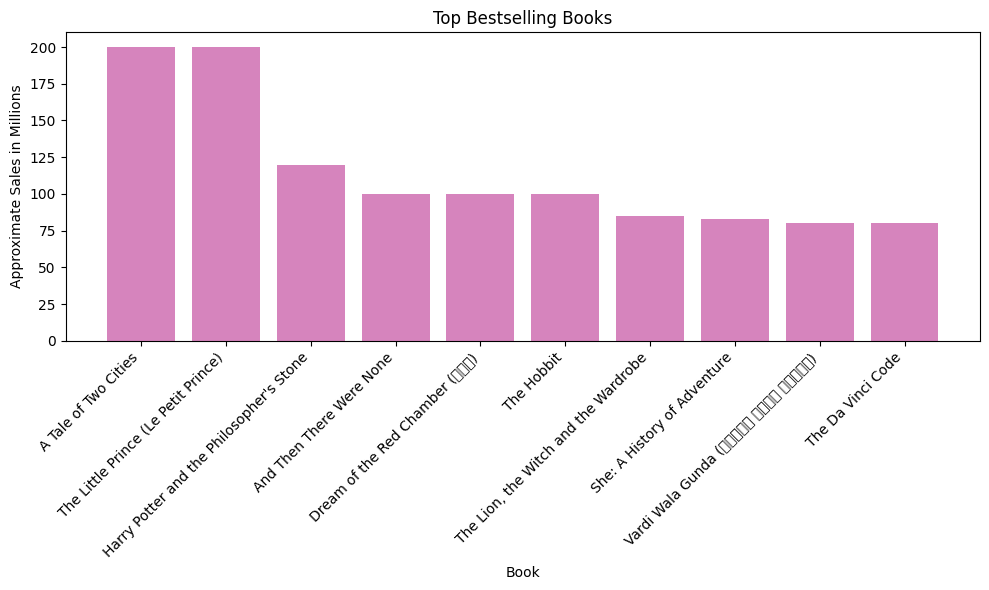

In [ ]:
# Bestselling Book Analysis
bestselling_books = data.sort_values(by='Approximate sales in millions', ascending=False).head(10)

# Bestselling Books Visualization
plt.figure(figsize=(10, 6))
plt.bar(bestselling_books['Book'], bestselling_books['Approximate sales in millions'], color='#D684BD')
plt.xlabel('Book')
plt.ylabel('Approximate Sales in Millions')
plt.title('Top Bestselling Books')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## There are two best selling books which are "A tale of two cities" and "the little prince" with an approximate sale of 200 million

# **Author Analysis**

In [ ]:
# Group the data by authors and calculate the number of books published by each author
books_per_author = data.groupby('Author(s)').size().reset_index(name='Number of books published')

# Group the data by authors and calculate the total sales for each author
total_sales_per_author = data.groupby('Author(s)')['Approximate sales in millions'].sum().reset_index(name='Total Sales (Millions)')

# Merge the two DataFrames on the 'Author(s)' column
author_analysis = pd.merge(books_per_author, total_sales_per_author, on='Author(s)')

#Sort the DataFrame in descending order based on total sales to identify popular authors
author_analysis_sorted = author_analysis.sort_values(by='Total Sales (Millions)', ascending=False).head(10)

# Display the result
author_analysis_sorted


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Author(s),Number of books published,Total Sales (Millions)
41,J. K. Rowling,7,522.0
5,Antoine de Saint-Exupéry,1,200.0
15,Charles Dickens,1,200.0
19,Dan Brown,3,149.0
0,Agatha Christie,1,100.0
12,Cao Xueqin,1,100.0
43,J. R. R. Tolkien,1,100.0
11,C. S. Lewis,1,85.0
36,H. Rider Haggard,1,83.0
97,Ved Prakash Sharma,1,80.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


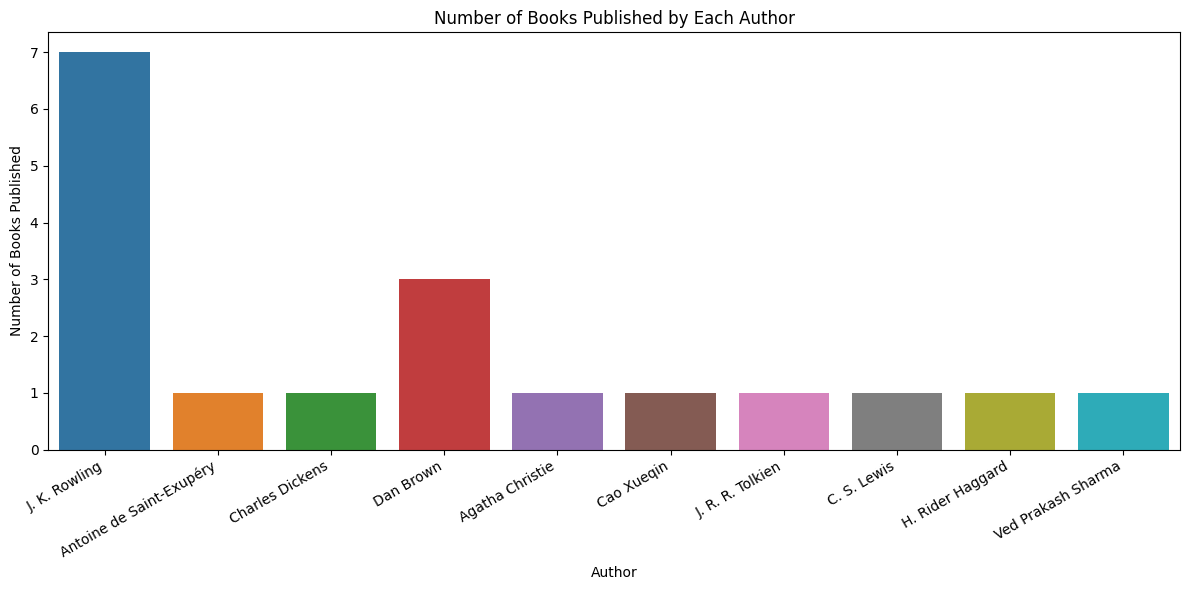

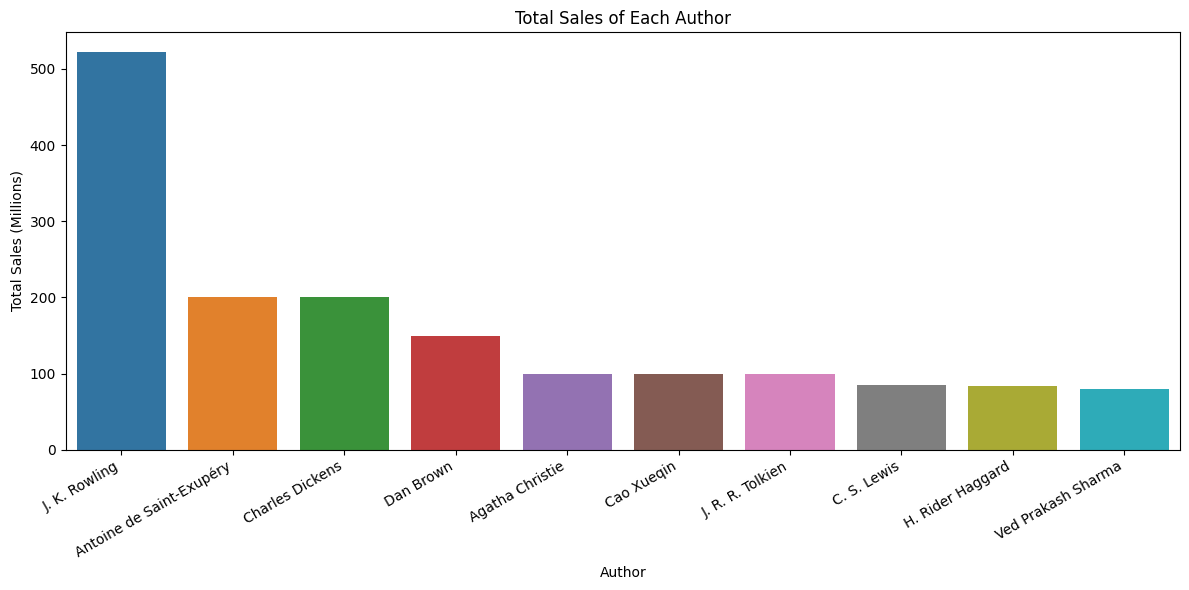

In [ ]:
# Bar plot for the number of books published by each author
plt.figure(figsize=(12, 6))
sns.barplot(x=author_analysis_sorted['Author(s)'], y=author_analysis_sorted['Number of books published'],data=author_analysis_sorted)
plt.xlabel('Author')
plt.ylabel('Number of Books Published')
plt.title('Number of Books Published by Each Author')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for the total sales of each author
plt.figure(figsize=(12, 6))
sns.barplot(x=author_analysis_sorted['Author(s)'],y=author_analysis_sorted['Total Sales (Millions)'],data=author_analysis_sorted)
plt.xlabel('Author')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales of Each Author')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


## According to the above vizualizations "JK Rowling" is the author who wrote highest number of books and he is the with high sales

# 	**Language and Sales Correlation**

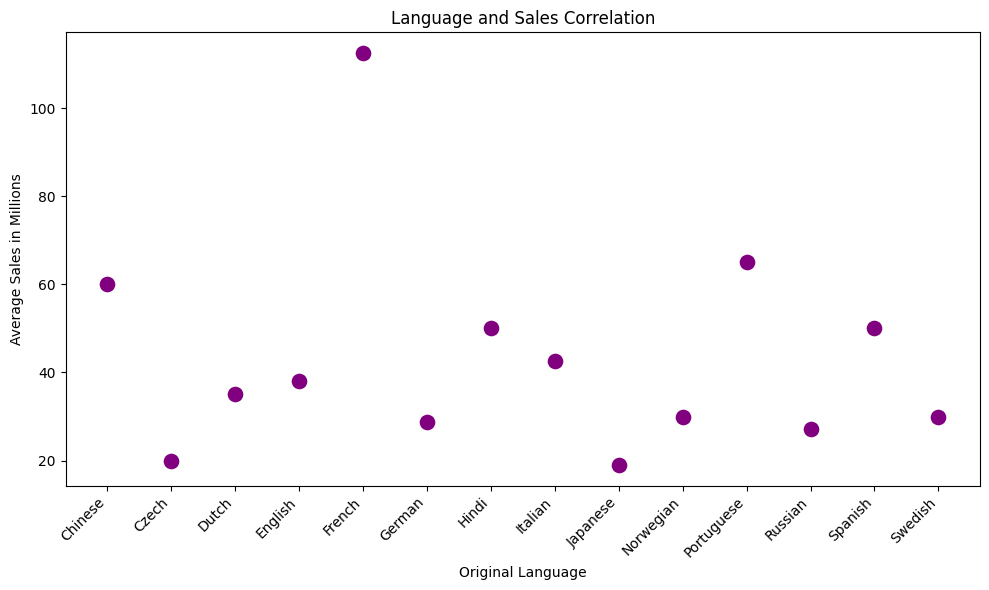

In [ ]:
#Language and Sales Correlation Analysis
# Group the data by the original language and calculate the average sales figures for each language
language_sales = data.groupby('Original language')['Approximate sales in millions'].mean().reset_index()

#Language and Sales Correlation Visualization (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=language_sales['Original language'],y=language_sales['Approximate sales in millions'], color='purple', s=150)
plt.xlabel('Original Language')
plt.ylabel('Average Sales in Millions')
plt.title('Language and Sales Correlation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## The correlation between sales and language is high for french.

# **Genre  Distribution**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


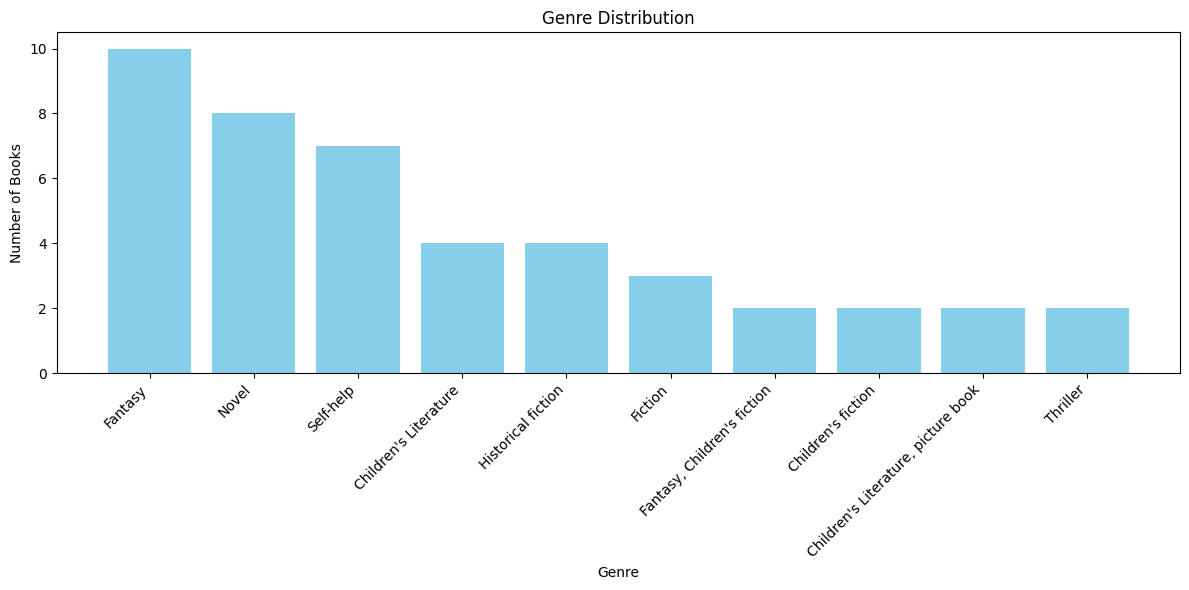

In [ ]:
# Genre Distribution Analysis
genre_distribution = data['Genre'].value_counts().head(10)

# Genre Distribution Visualization (Bar Chart)
plt.figure(figsize=(12, 6))
plt.bar(genre_distribution.index, genre_distribution.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




## By this we can understand that "Fantasy" is the genre which  most of the authors opt.

In [ ]:
data.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Book', 'Author(s)', 'Original language', 'First published',
       'Approximate sales in millions', 'Genre'],
      dtype='object')

In [ ]:
books_published = data.groupby('Book')['First published'].mean().reset_index()
bookspublished=books_published.sort_values(by='First published',ascending=False)
bookspublished
bookspublished=pd.DataFrame(books_published)
bookspublished


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Book,First published
0,A Brief History of Time,1988.0
1,A Message to Garcia,1899.0
2,A Tale of Two Cities,1859.0
3,Adventures of Huckleberry Finn,1885.0
4,Alcoholics Anonymous Big Book,1939.0
...,...,...
113,Where the Wild Things Are,1963.0
114,Who Moved My Cheese?,1998.0
115,Wolf Totem (狼图腾),2004.0
116,You Can Heal Your Life,1984.0


# **Publication Year Analysis**

In [ ]:
grouped2 = data.groupby(['First published'])['Book'].count().reset_index()
grouped1 = grouped2.sort_values(by=['Book'], ascending=False).head(10)
grouped1



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,First published,Book
57,1988,4
51,1979,4
67,2003,3
76,2012,3
69,2005,3
19,1936,3
24,1945,2
55,1984,2
22,1939,2
26,1947,2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


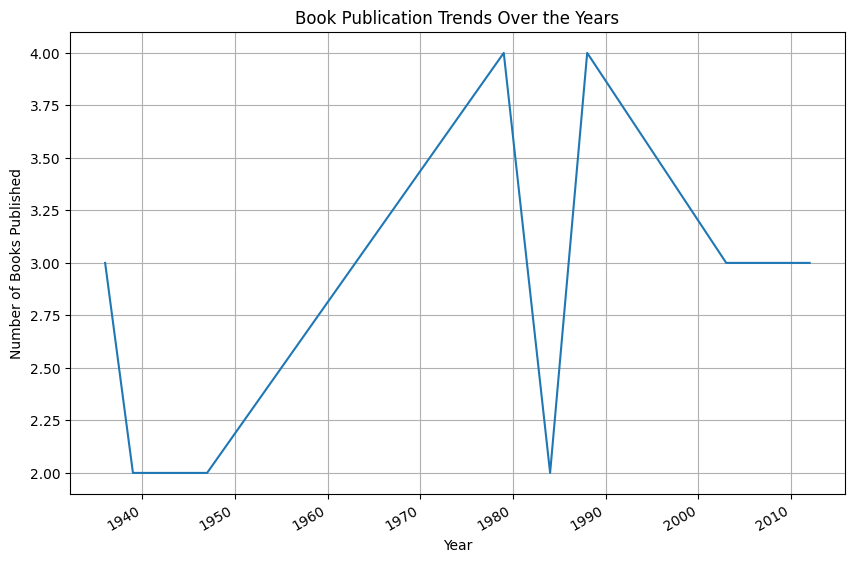

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='First published',y='Book',data=grouped1)
plt.title('Book Publication Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=30,ha='right')
plt.grid(True)
plt.show()

### By the above graph we have highest publications in the years 1979 and 1988.

In [ ]:
# Filter the data based on the specified genre
genre_to_check = 'Fantasy'
genre_data = data[data['Genre'] == genre_to_check]

# Group the data by author and calculate the total sales figures for each author within the genre
author_sales = genre_data.groupby('Author(s)')['Approximate sales in millions'].sum().reset_index()

# Sort the authors based on their sales figures in descending order
top_authors = author_sales.sort_values(by='Approximate sales in millions', ascending=False).head(5)
top_authors

# Display the output as a DataFrame
print(f"Top Authors in {genre_to_check.capitalize()} Genre:")
print(top_authors[['Author(s)', 'Approximate sales in millions']])


Top Authors in Fantasy Genre:
          Author(s)  Approximate sales in millions
0     J. K. Rowling                          522.0
1  J. R. R. Tolkien                          100.0
2      Paulo Coelho                           65.0
3     Richard Adams                           50.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


By this we can know the top authors for each genre

In [ ]:
genre= data.groupby('First published').count().reset_index().head(10)
genre


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,First published,Book,Author(s),Original language,Approximate sales in millions,Genre
0,1788,1,1,1,1,1
1,1791,1,1,1,1,1
2,1813,1,1,1,1,1
3,1859,1,1,1,1,1
4,1869,1,1,1,1,1
5,1877,1,1,1,1,1
6,1880,2,2,2,2,2
7,1881,1,1,1,1,1
8,1885,1,1,1,1,1
9,1887,1,1,1,1,1


In [ ]:
groupedg = data.groupby(['Genre', 'Author(s)'])['Approximate sales in millions'].count().reset_index()
groupedc = groupedg.sort_values(by=['Genre','Approximate sales in millions'], ascending=False).head(15)
top_authors_by_genre = groupedc.groupby('Genre').head(10)
top_authors_by_genre



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Genre,Author(s),Approximate sales in millions
110,Young adult romantic novel,John Green,1
109,Young adult novel,Sue Townsend,1
108,Young adult historical novel,Alexander Alexandrovich Fadeyev,1
107,Young adult fiction,Suzanne Collins,1
106,"Young Adult novel, adventure, war, science fic...",Suzanne Collins,1
105,"Young Adult novel, adventure, dystopian, scien...",Suzanne Collins,1
104,Young Adult Fiction,Markus Zusak,1
103,"War, thriller",Jack Higgins,1
102,War novel,Erich Maria Remarque,1
101,Unfinished satirical dark comedy novel,Jaroslav Hašek,1


# **Book Sales Trends**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-58-985e360ee3b6>:16: UserWarning: Glyph 29436 (\N{CJK UNIFIED IDEOGRAPH-72FC}) missing from current font.
  plt.tight_layout()
<ipython-input-58-985e360ee3b6>:16: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
<ipython-input-58-985e360ee3b6>:16: UserWarning: Glyph 33150 (\N{CJK UNIFIED IDEOGRAPH-817E}) missing from current font.
  plt.tight_layout()
<ipython-input-58-985e360ee3b6>:16: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  plt.tight_layout()
<ipython-input-58-985e360ee3b6>:16: UserWarning: Matplotlib currently does not suppo

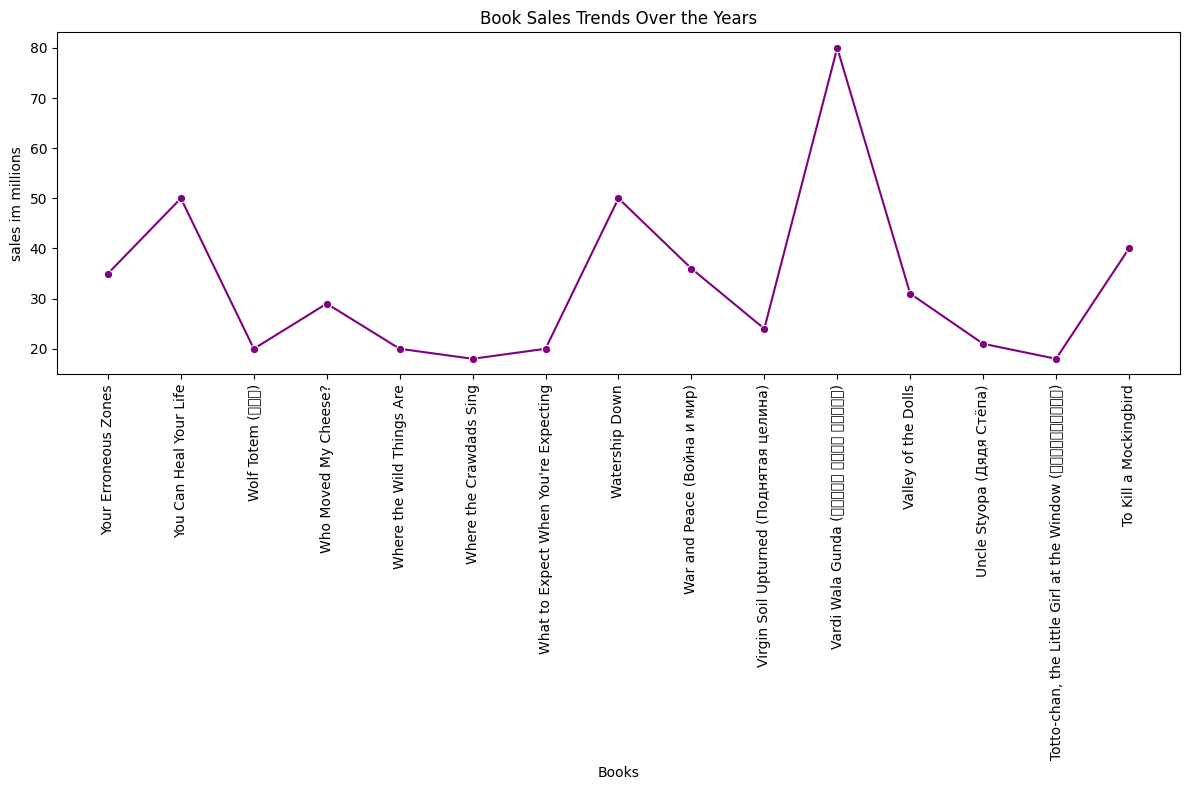

In [ ]:

# Book Sales Trends Analysis
# sales_trends = data.groupby('Book')['Approximate sales in millions'].sum()
grouped3 = data.groupby(['Book','Approximate sales in millions'])['First published'].count().reset_index()
grouped4 = grouped3.sort_values(by=['Book','First published'], ascending=False).head(15)




# Book Sales Trends Visualization (Line Plot)
plt.figure(figsize=(12,8))
sns.lineplot(x='Book', y='Approximate sales in millions',data=grouped4,marker='o', color='purple')
plt.xlabel('Books')
plt.ylabel('sales im millions')
plt.title('Book Sales Trends Over the Years')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


"Varadi wala Gunda" is the most selling book based on the publication year

In [ ]:
genre_popularity = data.groupby(['Original language'])['Genre','Approximate sales in millions','Original language'].head(10)
group=genre_popularity.sort_values(by=['Approximate sales in millions','Original language'], ascending=False).head(8)
group


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Genre,Approximate sales in millions,Original language
1,Novella,200.0,French
0,Historical fiction,200.0,English
2,Fantasy,120.0,English
3,Mystery,100.0,English
5,Fantasy,100.0,English
4,Family saga,100.0,Chinese
6,"Fantasy, Children's fiction",85.0,English
7,Adventure,83.0,English


# **Popular Genres in Different Languages**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


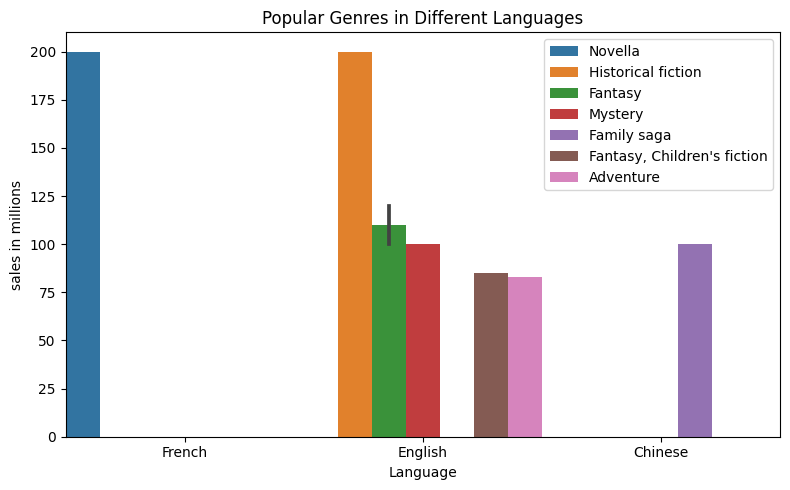

In [ ]:

# Popular Genres in Different Languages Analysis
#Popular Genres in Different Languages Visualization (Stacked Bar Plot)
plt.figure(figsize=(8,5))
sns.barplot(data=group, x='Original language', y='Approximate sales in millions', hue='Genre',width=1)
plt.xlabel('Language')
plt.ylabel('sales in millions')
plt.title('Popular Genres in Different Languages')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### I Observed that Novella	genre got the highest sales in french language and Historical fiction	genre got the highest sales in English Language

## **Create book recommendations based on user preferences for specific genres.**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# Genre-Based Recommendations (Content-Based Filtering)
def genre_based_recommendations(user_genre, n=5):
    # Filter the data based on the user's preferred genre
    genre_data = data[data['Genre'] == user_genre]

    # Check if there are books available in the given genre
    if genre_data.empty:
        print(f"No books available in the '{user_genre}' genre.")
        return None

    # Create a TF-IDF vectorizer to convert genre descriptions into numerical vectors
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(genre_data['Genre'])

    # Calculate the cosine similarity between books based on their genre descriptions
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Get the index of the user's selected book
    user_book_index = genre_data.index[0]

    # Get the similarity scores of the user's selected book with all other books in the genre
    sim_scores = list(enumerate(cosine_sim[user_book_index]))

    # Sort the books based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top n most similar books
    book_indices = [i[0] for i in sim_scores[1:n+1]]

    # Return the recommended books
    recommended_books = data.iloc[book_indices]
    return recommended_books



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Example usage of genre_based_recommendations:
user_genre = 'Fantasy'
recommended_books = genre_based_recommendations(user_genre, n=5)

if recommended_books is not None:
    print(recommended_books[['Book','Author(s)', 'Approximate sales in millions', 'Genre']])


                                       Book                 Author(s)  \
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
3                  And Then There Were None           Agatha Christie   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   
5                                The Hobbit          J. R. R. Tolkien   

   Approximate sales in millions        Genre  
1                          200.0      Novella  
2                          120.0      Fantasy  
3                          100.0      Mystery  
4                          100.0  Family saga  
5                          100.0      Fantasy  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **: Build a book recommendation engine based on  Author, and other features.**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Create a combined feature for content-based recommendations
data['combined_features'] = data['Book'] + ' ' + data['Author(s)'] + ' ' + data['Original language'] + ' ' + data['Genre']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined features
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_features'])

# Calculate the cosine similarity between items
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get book recommendations for a specific book
book_to_check ='A Brief History of Time'   # Replace with the book you want recommendations for
book_index = data[data['Book'] == book_to_check].index[0]
similar_books_indices = cosine_sim[book_index].argsort()[::-1]

# Print recommended books
print(f"Recommended books for '{book_to_check}':")
for index in similar_books_indices[1:6]:  # Exclude the same book
    print(data['Book'][index])


Recommended books for 'A Brief History of Time':
Cosmos
The 7 Habits of Highly Effective People
She: A History of Adventure
Fear of Flying
Fifty Shades of Grey


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## we have succesfully implemented our recommendation engine which gives results according to our preference in genre,book and other features.

# **Book-Based Recommendations**

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a user-item interaction matrix (replace this with your actual matrix)
interaction_matrix = pd.pivot_table(data, values='Approximate sales in millions', index='Book', columns='Genre', fill_value=0)
interaction_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Genre,Adventure,Autobiographical novel,Autobiography,"Bildungsroman, Historical fiction",Biographical novel,Children's Literature,"Children's Literature, picture book",Children's fantasy novel,Children's fiction,Children's literature,...,Unfinished satirical dark comedy novel,War novel,"War, thriller",Young Adult Fiction,"Young Adult novel, adventure, dystopian, science fiction","Young Adult novel, adventure, war, science fiction, action thriller",Young adult fiction,Young adult historical novel,Young adult novel,Young adult romantic novel
Book,,,,,,,,,,,,,,,,,,,,,
A Brief History of Time,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Message to Garcia,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Tale of Two Cities,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventures of Huckleberry Finn,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alcoholics Anonymous Big Book,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Where the Wild Things Are,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Who Moved My Cheese?,0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wolf Totem (狼图腾),0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate the cosine similarity between books
similarities = cosine_similarity(interaction_matrix.T)
similarities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Create a dictionary to map Book names to indices
book_indices = {book: i for i, book in enumerate(interaction_matrix.index)}

# Function to recommend products based on similarity
def recommend_books(Book, num_recommendations=5):
    book_index = book_indices[Book]
    similar_books= similarities[book_index]
    recommended_indices = similar_books.argsort()[-num_recommendations-1:-1][::-1]
    recommended_books = [interaction_matrix.index[i] for i in recommended_indices]
    return recommended_books

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
book_to_recommend = "A Tale of Two Cities"
recommended_books = recommend_books(book_to_recommend)
print(f"Recommended Books for {book_to_recommend}:")
for books in recommended_books:
    print(books)


Recommended Books for A Tale of Two Cities:
The Hite Report
Harry Potter and the Deathly Hallows
Fifty Shades Darker
Fifty Shades of Grey
Flowers in the Attic


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CONCLUSION:Based on the above visualization There are two best selling books which are "A tale of two cities" and "the little prince" with an approximate sale of 200 million.Based on the above visualization we observed that Jk.Rowlings have the highest number of books and sales in the fantasy genre."Varadi wala Gunda" is the most selling book based on the publication year.We Observed that Novella	genre got the highest sales in french language and Historical fiction	genre got the highest sales in English Language.we done recommendations based on book to get related books.we have succesfully implemented our recommendation engine which gives results according to our preference in genre,book and other features.